In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load preprocessed dataset

data = pd.read_csv("filtered_listings.csv")

In [ ]:
# Ensure required columns exist
required_columns = ["id", "name", "host_id", "host_name", "neighbourhood_group", "neighbourhood", "is_fake"]
if not all(col in data.columns for col in required_columns):
    raise ValueError("Filtered listings CSV is missing required columns!")

In [ ]:
# Define features and target
X = data.drop(columns=required_columns)
y = data["is_fake"]

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
}

In [ ]:
# Initialize XGBoost and GridSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


C:\Users\ANEESH VISHWA\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:00:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best model
best_xgb = grid_search.best_estimator_

In [ ]:
# Evaluate model
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4950
           1       1.00      1.00      1.00      4235

    accuracy                           1.00      9185
   macro avg       1.00      1.00      1.00      9185
weighted avg       1.00      1.00      1.00      9185



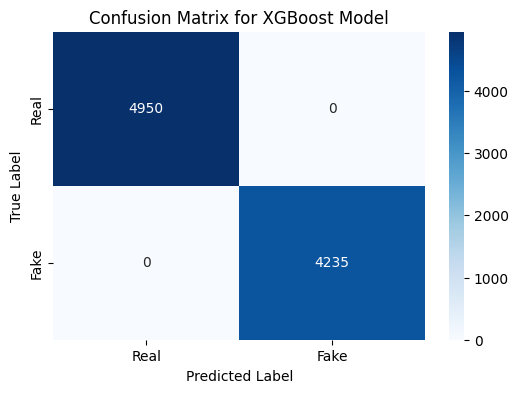

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

C:\Users\ANEESH VISHWA\AppData\Local\Temp\ipykernel_24648\3155220065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_idx][:10], y=feature_names[sorted_idx][:10], palette="viridis")


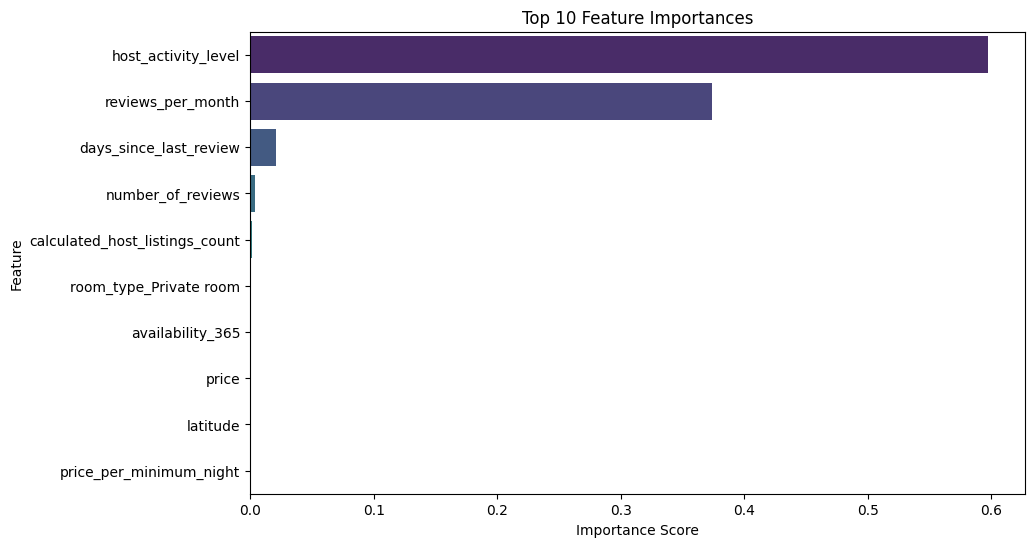

In [ ]:
# Feature Importance
feature_importances = best_xgb.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx][:10], y=feature_names[sorted_idx][:10], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.show()

In [ ]:
# Save model
joblib.dump(best_xgb, "xgboost_model.pkl")
print("Model saved successfully!")

Model saved successfully!
